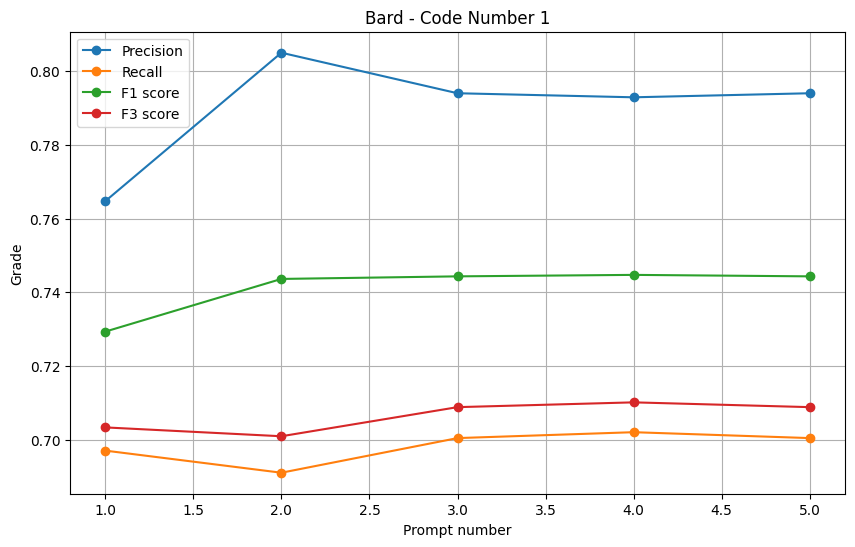

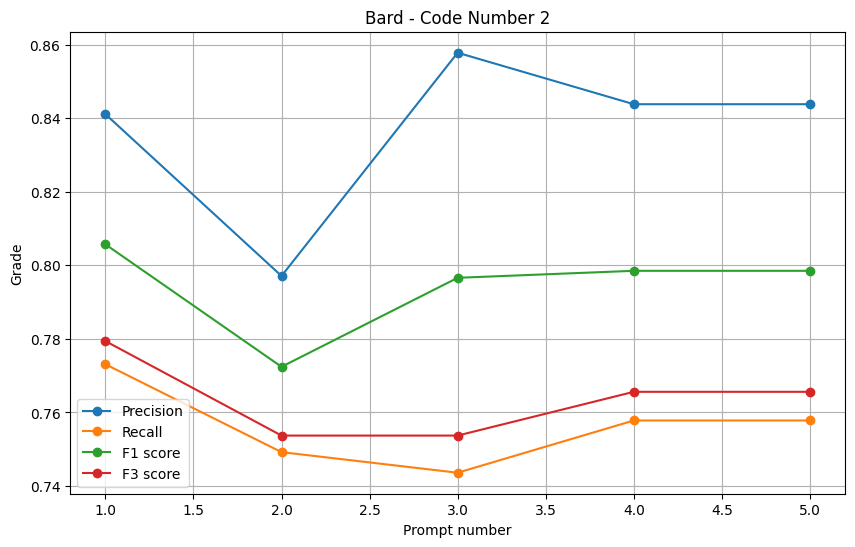

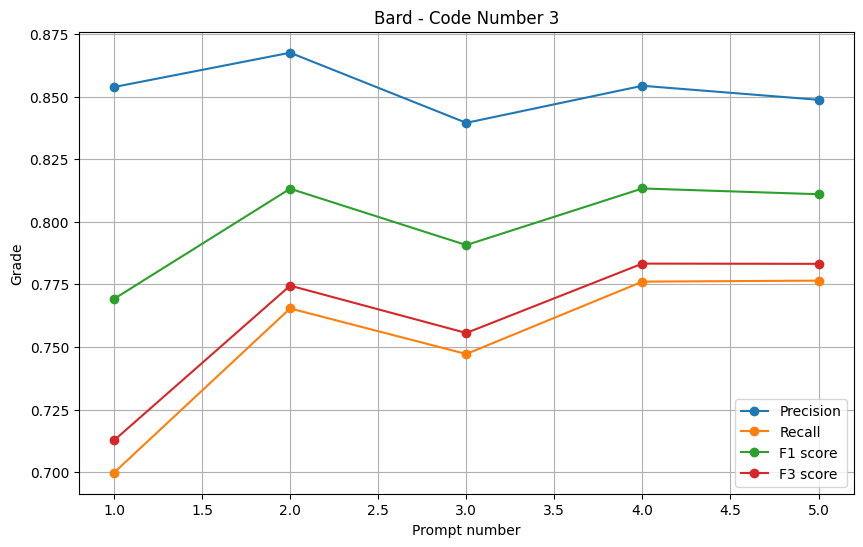

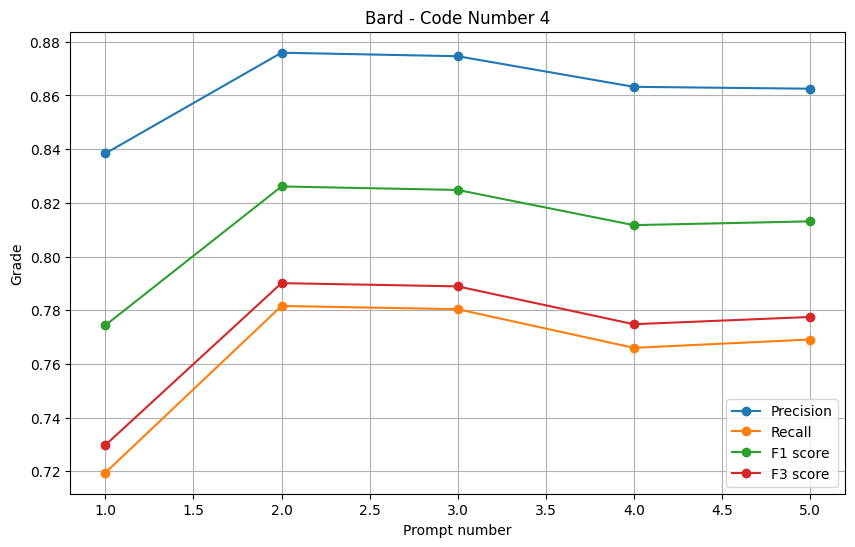

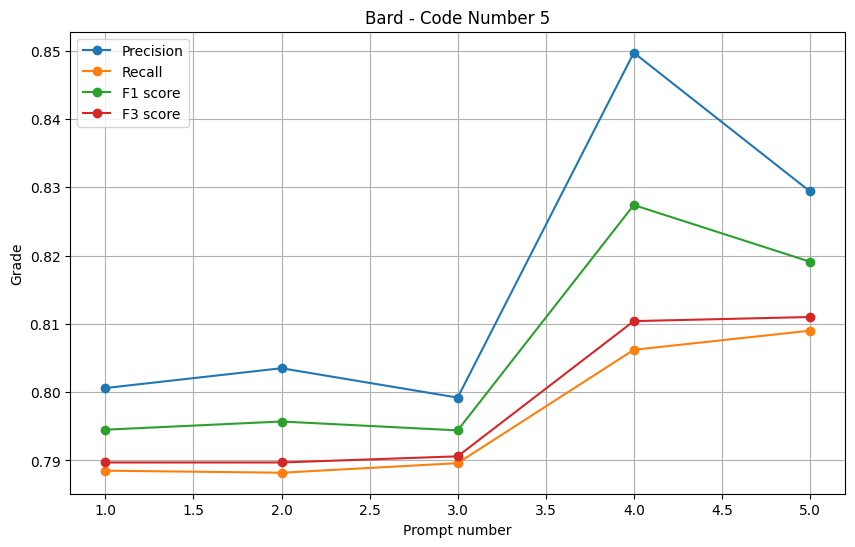

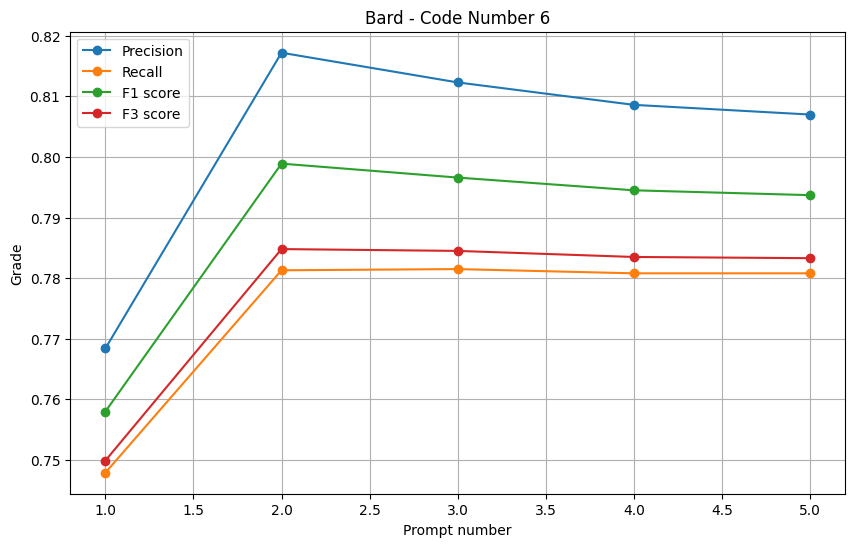

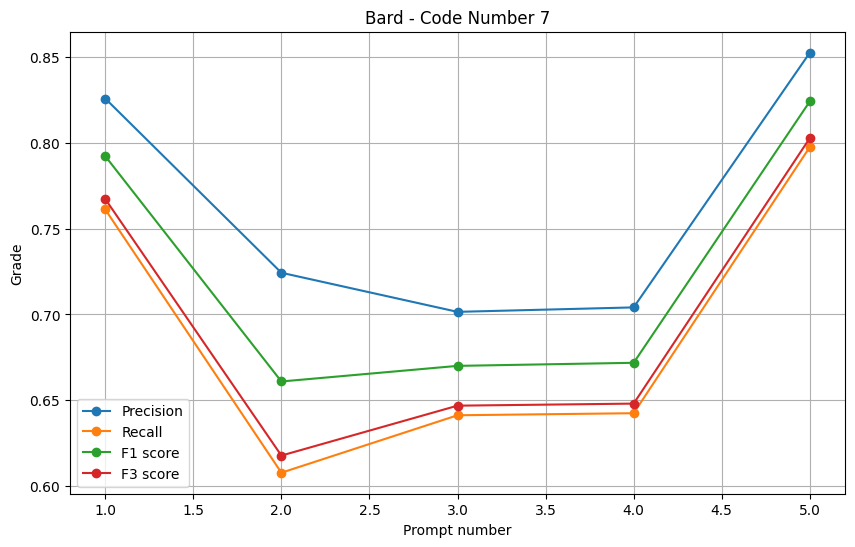

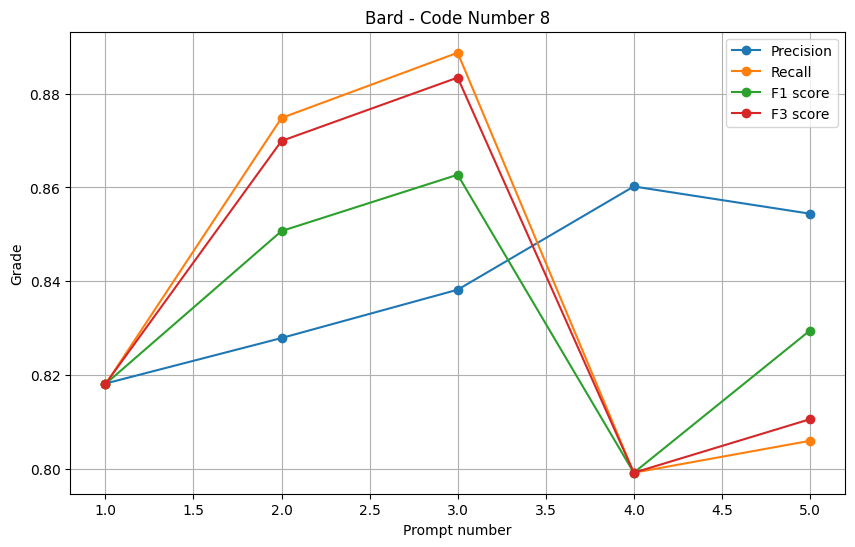

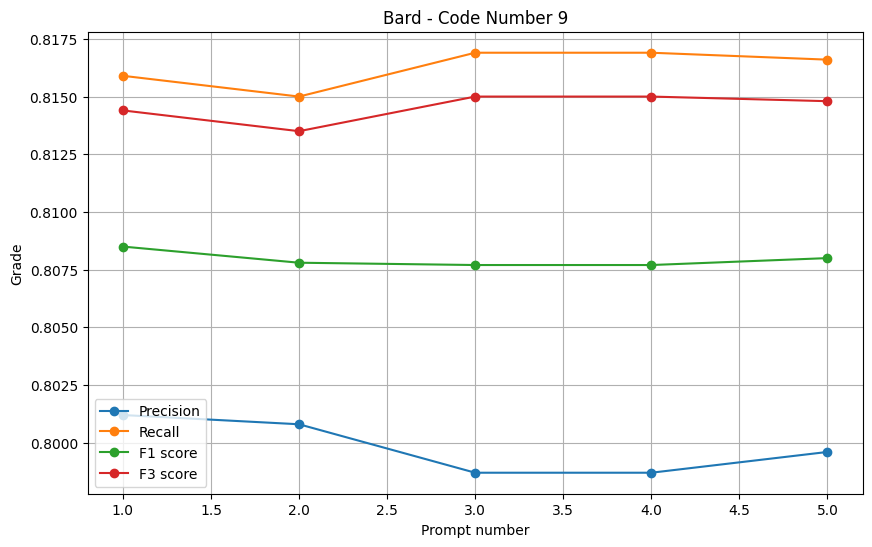

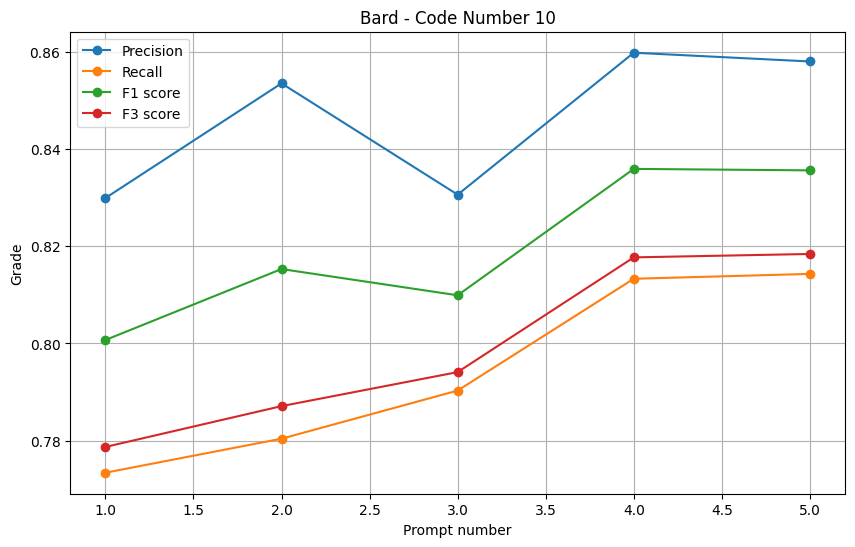

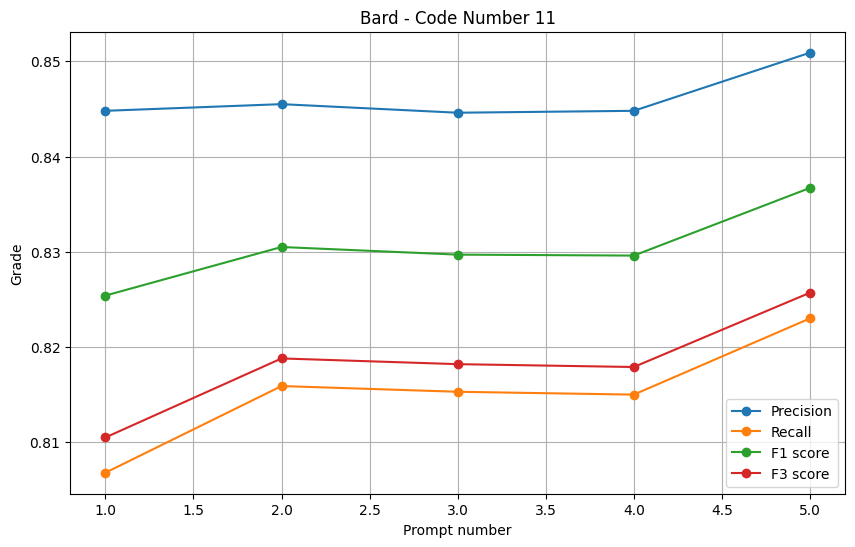

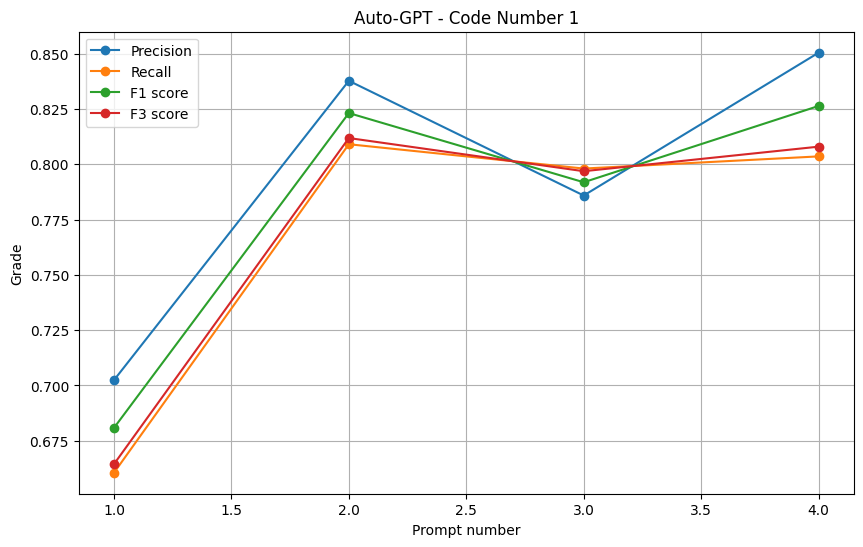

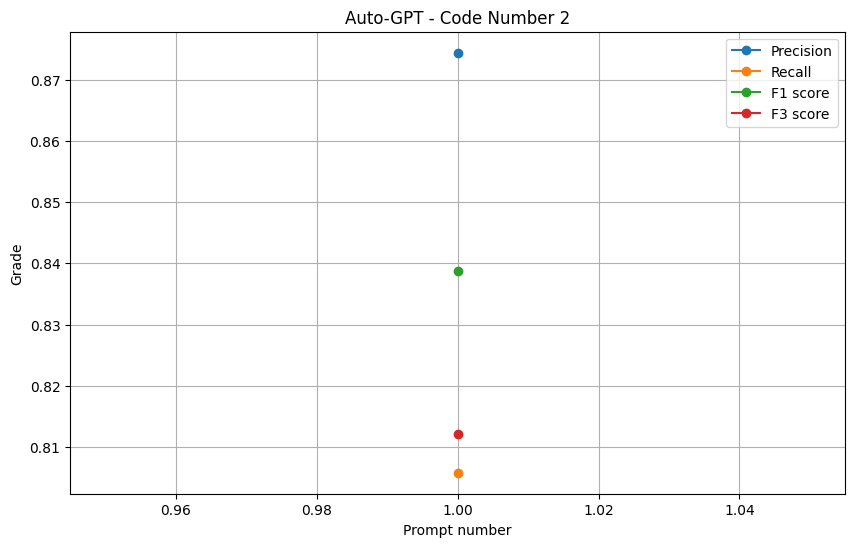

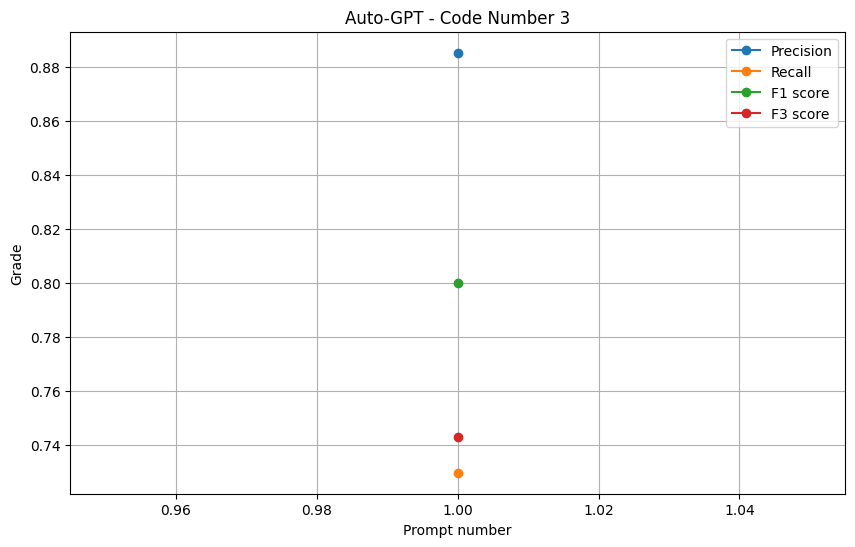

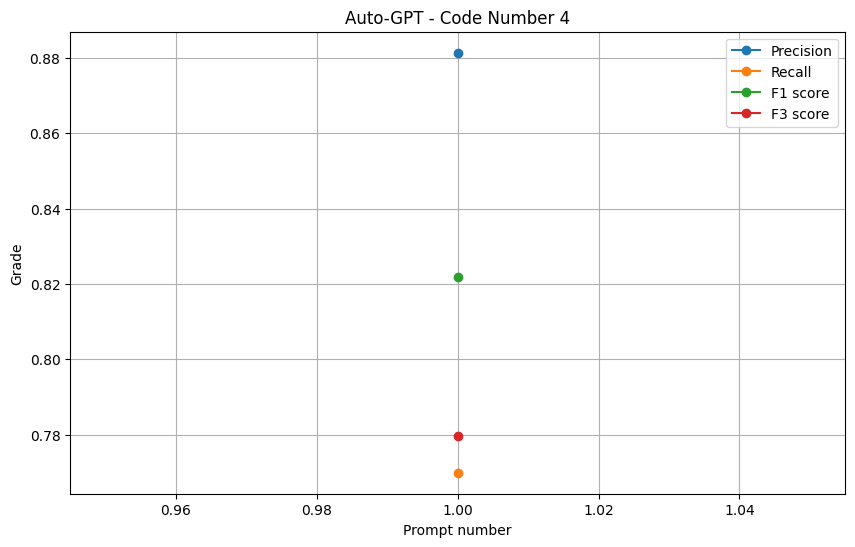

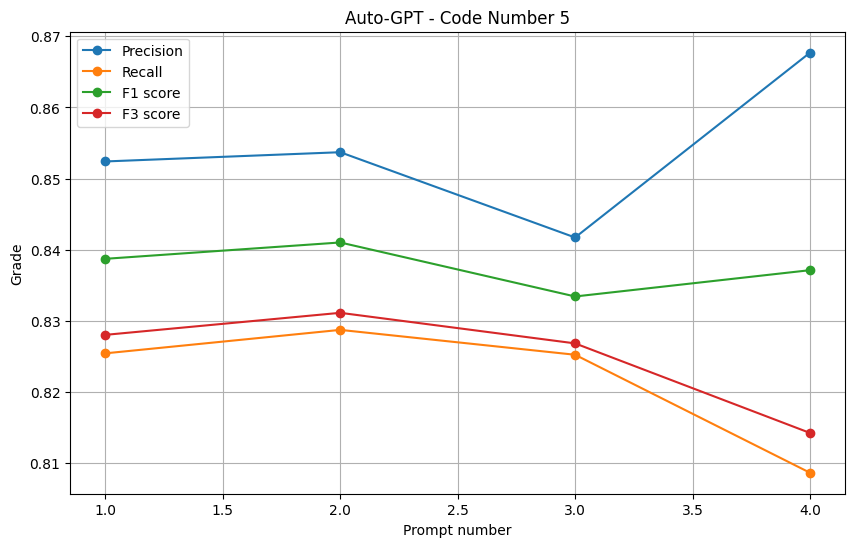

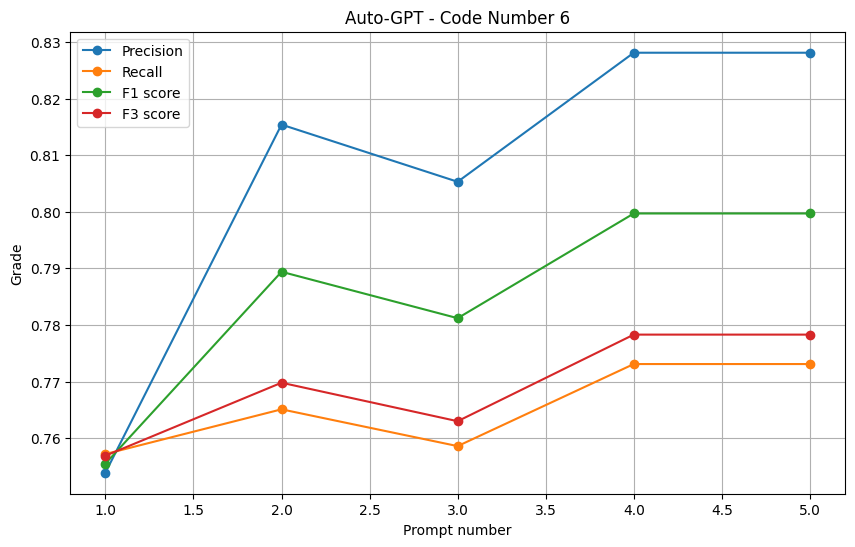

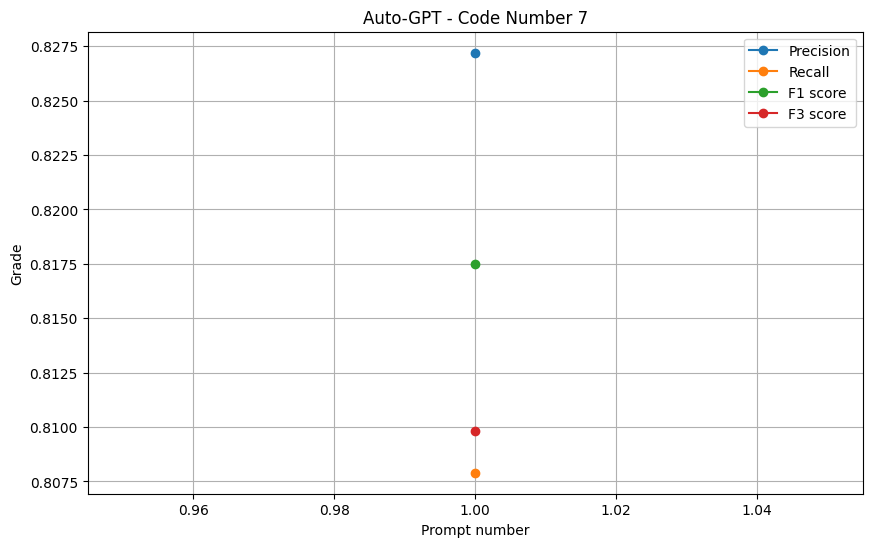

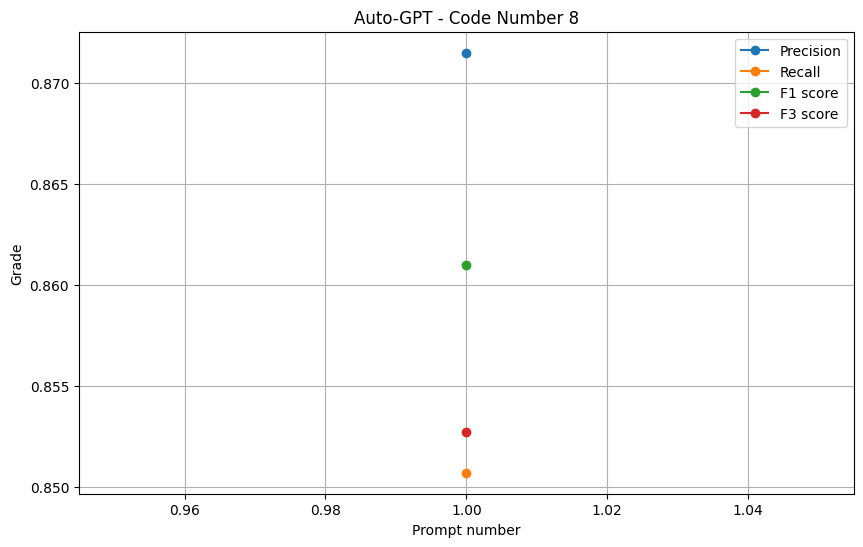

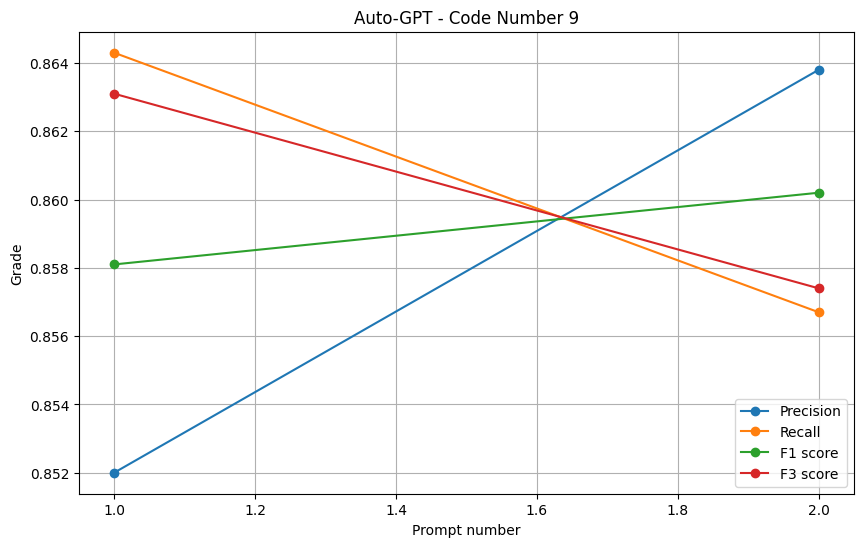

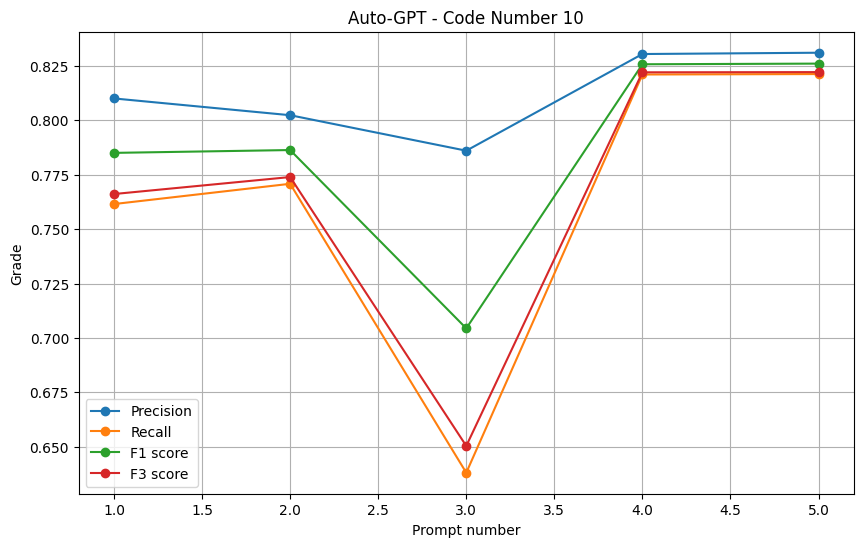

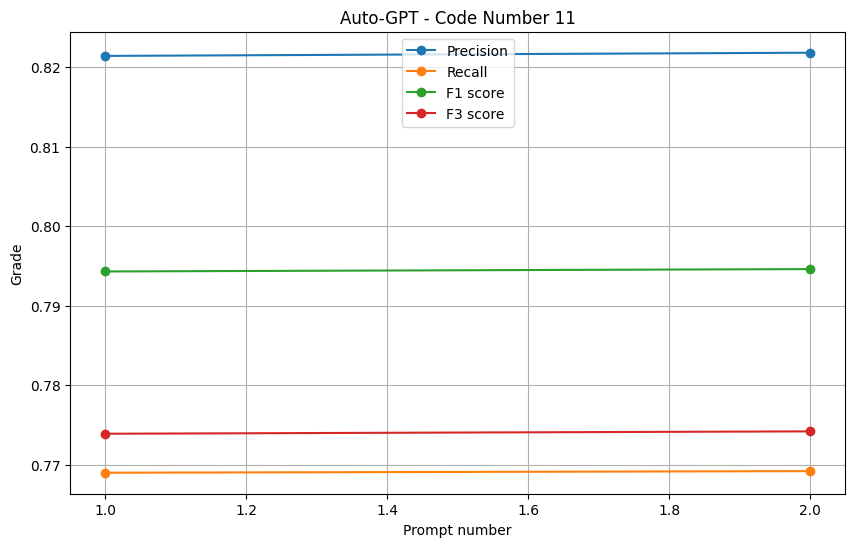

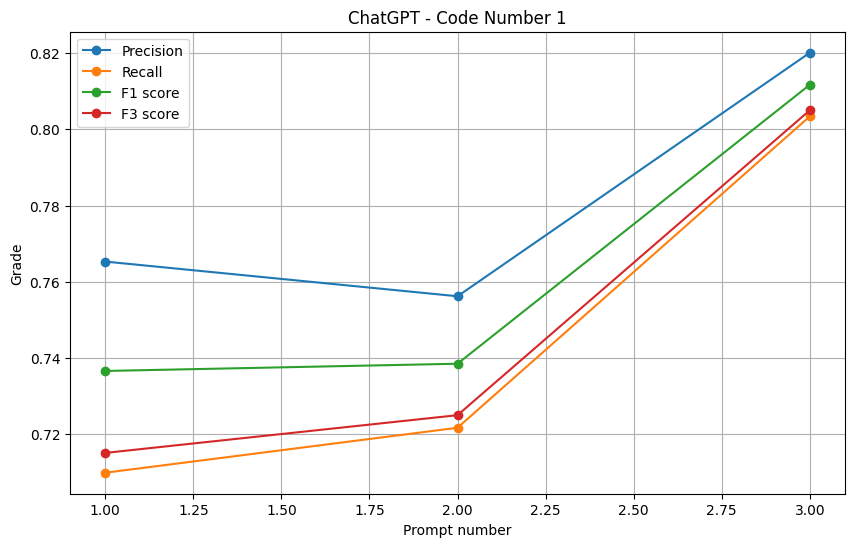

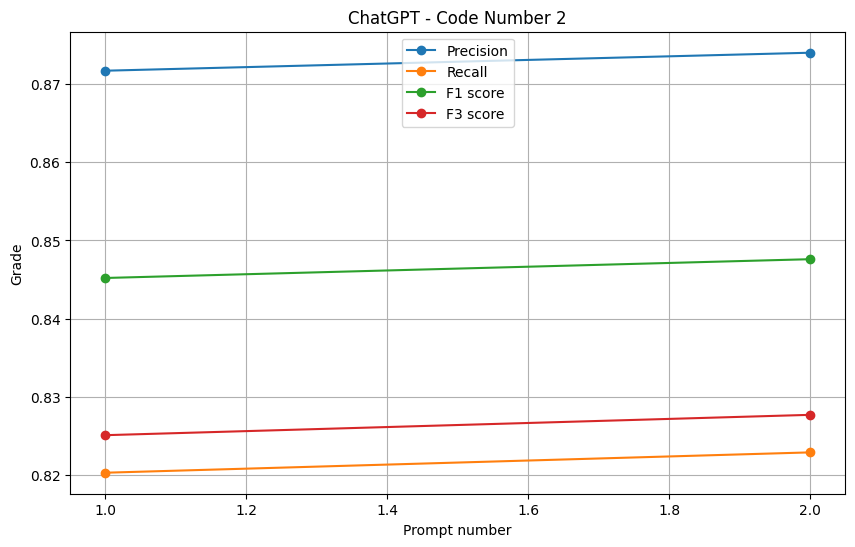

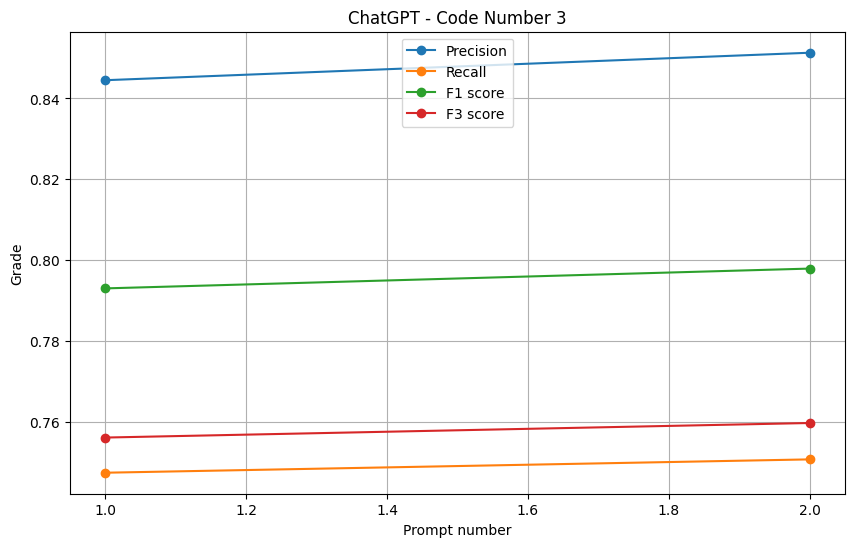

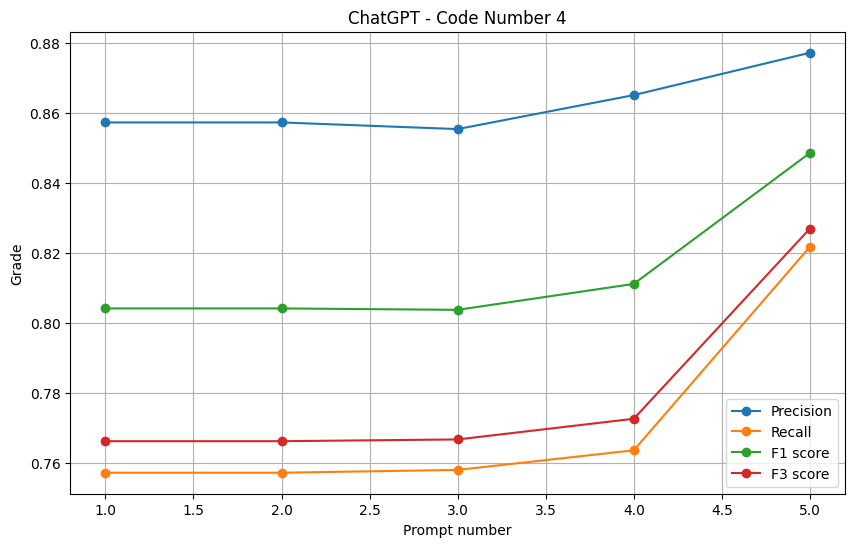

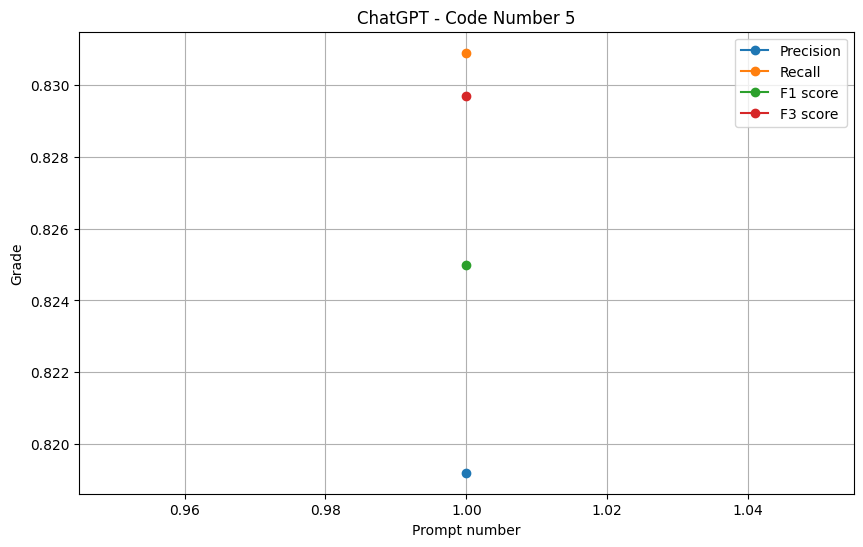

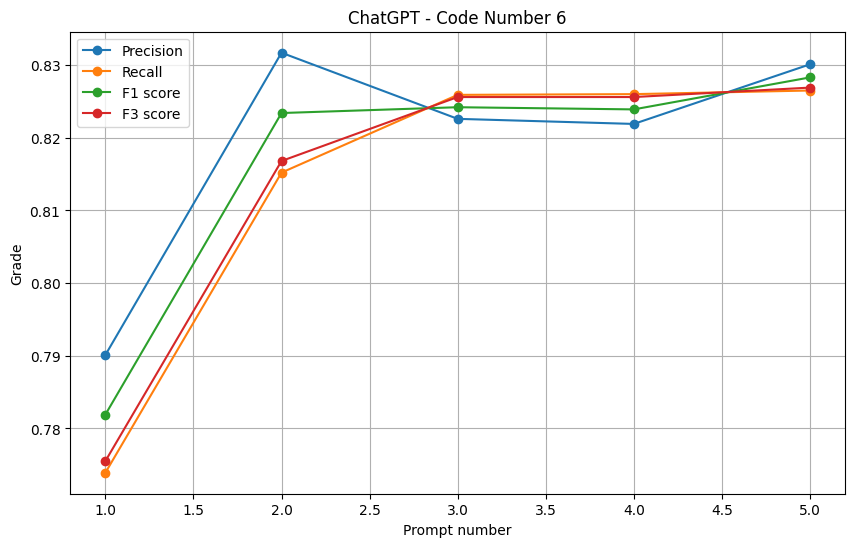

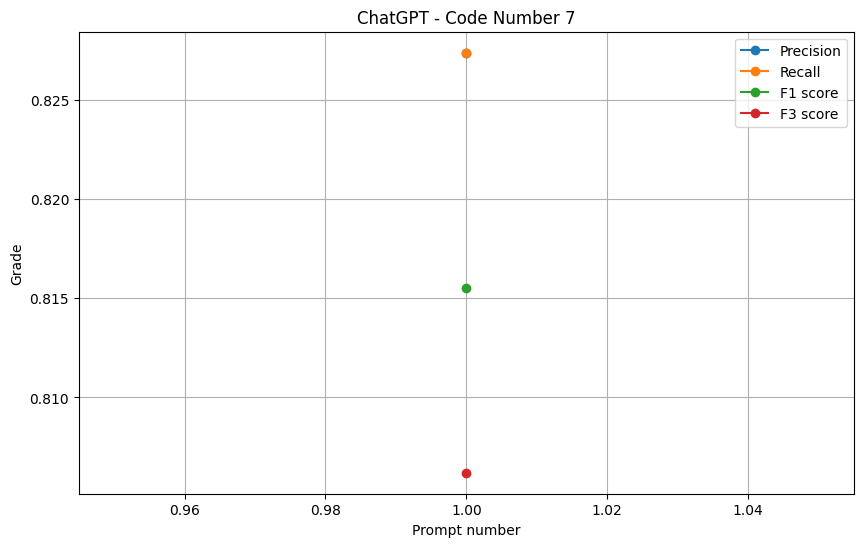

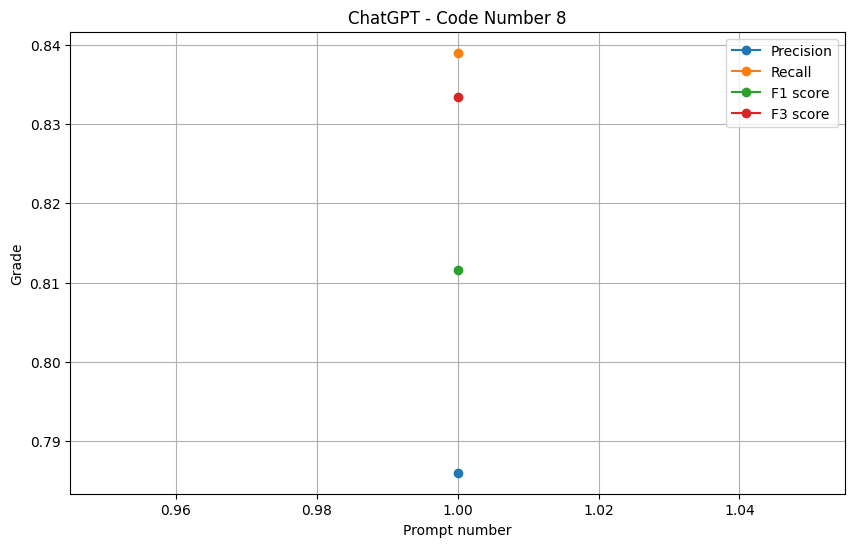

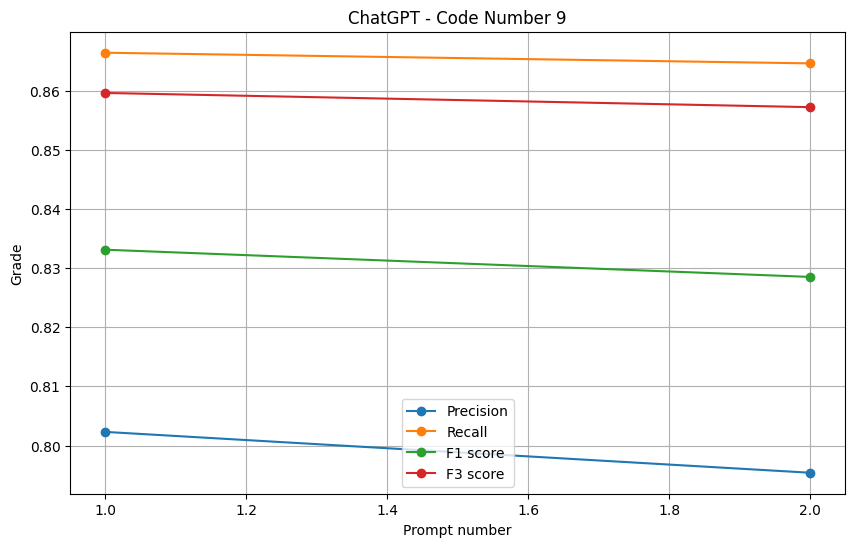

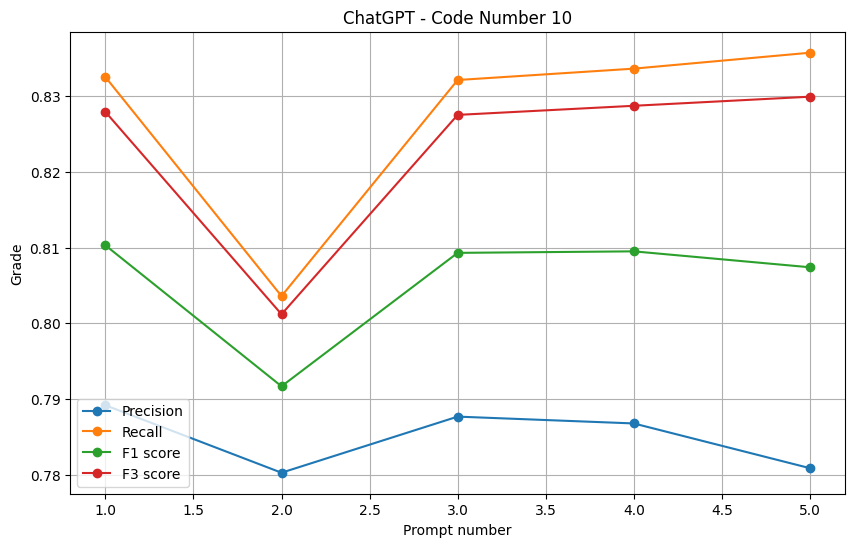

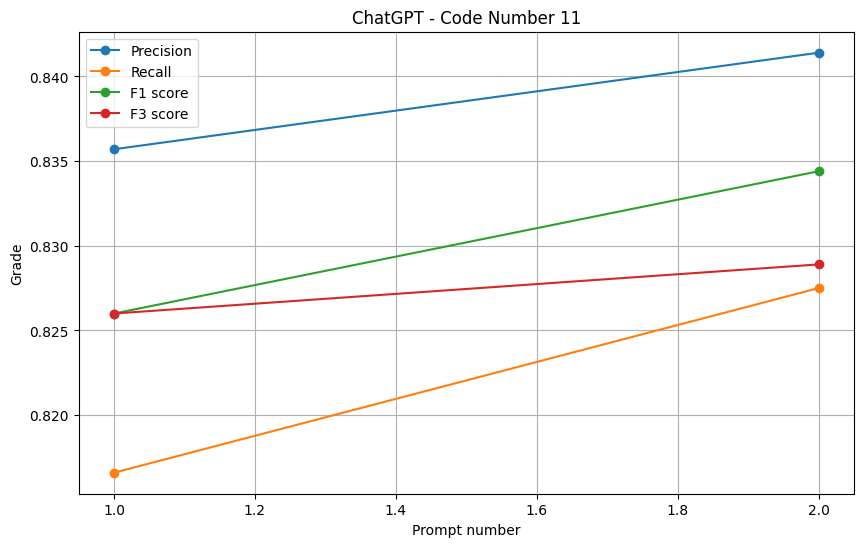

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Classeur1.xlsx")

# Divide the DataFrame into three sections for each model
bard_df = df.iloc[3:, 1:7]
autogpt_df = df.iloc[3:, 9:15]
chatgpt_df = df.iloc[3:, 17:]

# Rename the columns for each DataFrame
columns = ["Code numbers", "Prompt number", "Precision", "Recall", "F1 score", "F3 score"]
bard_df.columns = columns
autogpt_df.columns = columns
chatgpt_df.columns = columns

# Convert 'Code numbers' and 'Prompt number' to integers, and the grades to floats
for data in [bard_df, autogpt_df, chatgpt_df]:
    data["Code numbers"] = pd.to_numeric(data["Code numbers"], errors='coerce')
    data["Prompt number"] = pd.to_numeric(data["Prompt number"], errors='coerce')
    data["Precision"] = pd.to_numeric(data["Precision"], errors='coerce')
    data["Recall"] = pd.to_numeric(data["Recall"], errors='coerce')
    data["F1 score"] = pd.to_numeric(data["F1 score"], errors='coerce')
    data["F3 score"] = pd.to_numeric(data["F3 score"], errors='coerce')

# Fill missing 'Code numbers' with forward fill method
bard_df["Code numbers"].fillna(method='ffill', inplace=True)
autogpt_df["Code numbers"].fillna(method='ffill', inplace=True)
chatgpt_df["Code numbers"].fillna(method='ffill', inplace=True)

def create_plots(df, category):
    # Get unique code numbers
    code_numbers = df["Code numbers"].unique()

    # For each code number, create a plot
    for code in code_numbers:
        df_code = df[df["Code numbers"] == code]
        plt.figure(figsize=(10, 6))
        plt.plot(df_code["Prompt number"], df_code["Precision"], marker='o', label='Precision')
        plt.plot(df_code["Prompt number"], df_code["Recall"], marker='o', label='Recall')
        plt.plot(df_code["Prompt number"], df_code["F1 score"], marker='o', label='F1 score')
        plt.plot(df_code["Prompt number"], df_code["F3 score"], marker='o', label='F3 score')
        plt.title(f"{category} - Code Number {int(code)}")
        plt.xlabel("Prompt number")
        plt.ylabel("Grade")
        plt.legend()
        plt.grid(True)
        plt.show()

# Create plots for each category
create_plots(bard_df, "Bard")
create_plots(autogpt_df, "Auto-GPT")
create_plots(chatgpt_df, "ChatGPT")
